In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

2025-07-09 19:01:50.936698: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752087711.126089      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752087711.184358      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file("Flower_Photos",origin=dataset_url,cache_dir=".",untar=True)

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
data_dir

'./datasets/Flower_Photos'

In [5]:
import pathlib
data_dir = pathlib.Path('datasets/Flower_Photos/flower_photos')
data_dir

PosixPath('datasets/Flower_Photos/flower_photos')

In [6]:
list(data_dir.glob("*/*.jp*g"))[:5]

[PosixPath('datasets/Flower_Photos/flower_photos/roses/4754734410_94d98463a5.jpg'),
 PosixPath('datasets/Flower_Photos/flower_photos/roses/16339359979_6d742660b8_n.jpg'),
 PosixPath('datasets/Flower_Photos/flower_photos/roses/4231745228_ece86330d9.jpg'),
 PosixPath('datasets/Flower_Photos/flower_photos/roses/22385375599_1faf334f5d_n.jpg'),
 PosixPath('datasets/Flower_Photos/flower_photos/roses/8125886145_ae99f91fd0.jpg')]

In [7]:

image_paths = list(data_dir.rglob("*.jpg"))
print(len(image_paths)),
print(image_paths[:5])


3670
[PosixPath('datasets/Flower_Photos/flower_photos/roses/4754734410_94d98463a5.jpg'), PosixPath('datasets/Flower_Photos/flower_photos/roses/16339359979_6d742660b8_n.jpg'), PosixPath('datasets/Flower_Photos/flower_photos/roses/4231745228_ece86330d9.jpg'), PosixPath('datasets/Flower_Photos/flower_photos/roses/22385375599_1faf334f5d_n.jpg'), PosixPath('datasets/Flower_Photos/flower_photos/roses/8125886145_ae99f91fd0.jpg')]


In [8]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/Flower_Photos/flower_photos/roses/4754734410_94d98463a5.jpg'),
 PosixPath('datasets/Flower_Photos/flower_photos/roses/16339359979_6d742660b8_n.jpg'),
 PosixPath('datasets/Flower_Photos/flower_photos/roses/4231745228_ece86330d9.jpg'),
 PosixPath('datasets/Flower_Photos/flower_photos/roses/22385375599_1faf334f5d_n.jpg'),
 PosixPath('datasets/Flower_Photos/flower_photos/roses/8125886145_ae99f91fd0.jpg')]

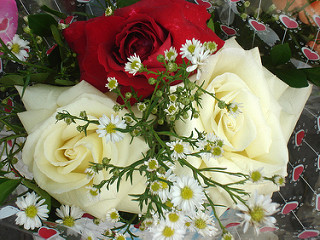

In [9]:

PIL.Image.open(str(roses[1]))

In [10]:
tulips = list(data_dir.glob('tulips/*'))
tulips[:5]

[PosixPath('datasets/Flower_Photos/flower_photos/tulips/13976206001_fd1c2cbd60.jpg'),
 PosixPath('datasets/Flower_Photos/flower_photos/tulips/7166554924_432aaae4b2_n.jpg'),
 PosixPath('datasets/Flower_Photos/flower_photos/tulips/8622237974_b362574785_n.jpg'),
 PosixPath('datasets/Flower_Photos/flower_photos/tulips/10163955604_ae0b830975_n.jpg'),
 PosixPath('datasets/Flower_Photos/flower_photos/tulips/738207467_fc59cfcd9b_z.jpg')]

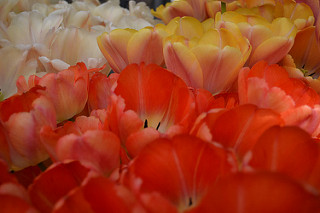

In [11]:
PIL.Image.open(str(tulips[1]))

In [12]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [14]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [17]:
flowers_images_dict["roses"][0:5]

[PosixPath('datasets/Flower_Photos/flower_photos/roses/4754734410_94d98463a5.jpg'),
 PosixPath('datasets/Flower_Photos/flower_photos/roses/16339359979_6d742660b8_n.jpg'),
 PosixPath('datasets/Flower_Photos/flower_photos/roses/4231745228_ece86330d9.jpg'),
 PosixPath('datasets/Flower_Photos/flower_photos/roses/22385375599_1faf334f5d_n.jpg'),
 PosixPath('datasets/Flower_Photos/flower_photos/roses/8125886145_ae99f91fd0.jpg')]

In [18]:
str(flowers_images_dict['roses'][0])

'datasets/Flower_Photos/flower_photos/roses/4754734410_94d98463a5.jpg'

In [20]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [21]:
img.shape

(333, 500, 3)

In [22]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [24]:
X, y = [], []
for flower_name,images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])
        

In [25]:
X = np.array(X)
y = np.array(y)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)


In [31]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [35]:
num_classes = 5
model = Sequential([
    layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='same'),
    layers.Conv2D(filters=32,kernel_size=4,padding="same",activation="relu"),
    layers.MaxPooling2D(pool_size=(3,3),strides=2,padding="same"),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)  
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30) 

I0000 00:00:1752088927.056907      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1752088927.057600      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Epoch 1/30


I0000 00:00:1752088933.418094     117 service.cc:148] XLA service 0x78f68814fd10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1752088933.418788     117 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1752088933.418816     117 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1752088933.816433     117 cuda_dnn.cc:529] Loaded cuDNN version 90300


 7/92 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.2140 - loss: 2.2122

I0000 00:00:1752088937.418218     117 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


92/92 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - accuracy: 0.3273 - loss: 1.6138
Epoch 2/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5771 - loss: 1.0527
Epoch 3/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6645 - loss: 0.8771
Epoch 4/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7177 - loss: 0.7537
Epoch 5/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7524 - loss: 0.6495
Epoch 6/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8550 - loss: 0.4062
Epoch 7/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9141 - loss: 0.2869
Epoch 8/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9587 - loss: 0.1537
Epoch 9/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9764 - loss: 0.0848
Epoch 10/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9937 - loss: 0.0332
Epoch 11/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9906 - loss: 0.0390
Epoch 12/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9958 - 

In [37]:
model.evaluate(X_test_scaled,y_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.6906 - loss: 2.5829


[2.5276384353637695, 0.6852861046791077]

In [38]:
predictions = model.predict(X_test_scaled)
predictions

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


array([[ 4.8020411e+00, -2.1006769e+01,  1.0856756e+01,  4.3061661e+01,
         1.7557766e+01],
       [ 1.9234228e+00, -6.9262877e+00,  3.4767605e+01, -3.0698385e+01,
        -1.3498767e+01],
       [-5.3766084e+00, -7.5079089e-01,  2.4274952e+01,  2.9528275e-02,
        -3.8551252e+00],
       ...,
       [ 6.3614911e-01,  3.7464228e-01,  4.4938426e+00,  1.6001875e+01,
         8.2917917e-01],
       [ 1.8090799e+01,  2.5947421e+00, -2.7871643e+01, -2.5946782e+00,
         3.4607147e+01],
       [ 8.9040575e+00, -9.9624830e-01, -6.5801768e+00, -2.8174927e+00,
         2.2195646e+01]], dtype=float32)

In [42]:
score = tf.nn.softmax(predictions[50])

In [43]:
np.argmax(score)

2

In [44]:
y_test[50]

1

In [63]:
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom

data_augmentation = keras.Sequential([
    RandomFlip("horizontal", input_shape=(128, 128, 3)),
    RandomRotation(0.1),
    RandomZoom(0.2),
])

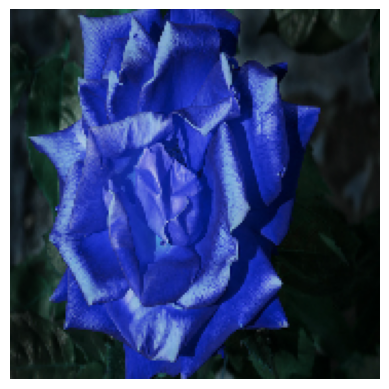

In [64]:
plt.axis('off')
plt.imshow(X[0])

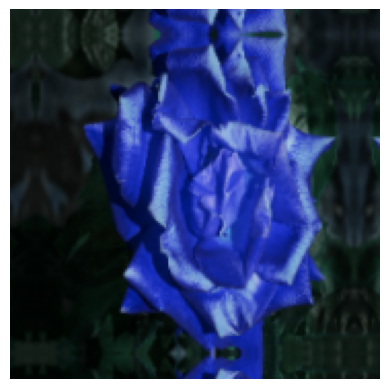

In [65]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [68]:
num_classes = 5

model = Sequential([
    data_augmentation,
    layers.Conv2D(40, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(80, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(100, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    
    
    layers.GlobalAveragePooling2D(),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),

    layers.Dense(num_classes)
])


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30) 

Epoch 1/30


E0000 00:00:1752090823.718896      36 meta_optimizer.cc:966] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/sequential_11_1/dropout_8_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


92/92 ━━━━━━━━━━━━━━━━━━━━ 11s 77ms/step - accuracy: 0.2720 - loss: 1.5465
Epoch 2/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - accuracy: 0.4355 - loss: 1.2654
Epoch 3/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - accuracy: 0.4974 - loss: 1.2022
Epoch 4/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - accuracy: 0.5238 - loss: 1.1461
Epoch 5/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - accuracy: 0.5365 - loss: 1.1239
Epoch 6/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - accuracy: 0.5519 - loss: 1.1014
Epoch 7/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - accuracy: 0.5978 - loss: 1.0475
Epoch 8/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - accuracy: 0.6006 - loss: 1.0208
Epoch 9/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - accuracy: 0.6008 - loss: 0.9896
Epoch 10/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - accuracy: 0.6389 - loss: 0.9433
Epoch 11/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - accuracy: 0.6332 - loss: 0.9494
Epoch 12/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - accuracy: 0.6364 - 

In [69]:
model.evaluate(X_test_scaled,y_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.6853 - loss: 0.8095


[0.8052679300308228, 0.6948229074478149]

In [73]:
from tensorflow.keras import layers, models, callbacks, optimizers

num_classes = 5

model = models.Sequential([
    data_augmentation,

    # 🔁 Block 1
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    # 🔁 Block 2
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    # 🔁 Block 3
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Dropout(0.3),

    # 🔁 Block 4 (Optional Extra Depth)
    layers.Conv2D(256, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.GlobalAveragePooling2D(),

    layers.Dense(256, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),

    layers.Dense(num_classes)
])
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.0005),  # smaller LR = more stable
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
early_stop = EarlyStopping(patience=4, restore_best_weights=True)

model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stop]
)


Epoch 1/20


E0000 00:00:1752091522.849114      36 meta_optimizer.cc:966] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/sequential_13_1/dropout_12_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


74/74 ━━━━━━━━━━━━━━━━━━━━ 15s 119ms/step - accuracy: 0.4491 - loss: 1.6209 - val_accuracy: 0.2262 - val_loss: 2.5945
Epoch 2/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 106ms/step - accuracy: 0.5754 - loss: 1.3338 - val_accuracy: 0.2262 - val_loss: 3.0158
Epoch 3/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 106ms/step - accuracy: 0.5973 - loss: 1.2207 - val_accuracy: 0.2262 - val_loss: 4.6168
Epoch 4/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 104ms/step - accuracy: 0.6371 - loss: 1.1703 - val_accuracy: 0.2262 - val_loss: 3.8064
Epoch 5/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 103ms/step - accuracy: 0.6380 - loss: 1.1346 - val_accuracy: 0.2347 - val_loss: 3.4539
Epoch 6/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 103ms/step - accuracy: 0.6682 - loss: 1.0560 - val_accuracy: 0.3384 - val_loss: 2.0555
Epoch 7/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 103ms/step - accuracy: 0.6683 - loss: 1.0622 - val_accuracy: 0.4524 - val_loss: 1.8528
Epoch 8/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 103ms/step - accuracy: 0.6952 - loss: 0.9980 - val_accuracy: 0.6224 - val

In [74]:
model.evaluate(X_test_scaled,y_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7315 - loss: 0.8273


[0.8256239891052246, 0.7302452325820923]

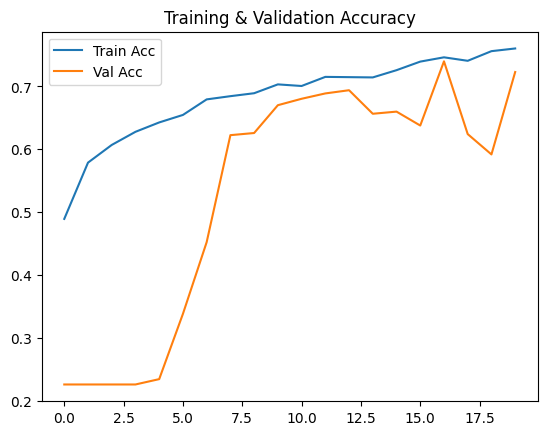

In [75]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Training & Validation Accuracy")
plt.show()
